###  Created by Luis A. Sanchez-Perez (alejand@umich.edu)

In [1]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as alg
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
# Generates sampled data with noise
rnd.seed(10)
m = 20
x = np.linspace(0,20,m).reshape((m,1))
poly = PolynomialFeatures(degree = 2)
X = poly.fit_transform(x)
noise = 2
wreal = [-1.5, 1/9]
y = X[:,1:3].dot(wreal) + rnd.normal(0,noise,m)

In [3]:
# Generates dataset using polynomial features
d = 3
poly = PolynomialFeatures(degree = d)
X = poly.fit_transform(x)
scaler = StandardScaler()
X[:,1:] = scaler.fit_transform(X[:,1:])

In [4]:
# Generates mesh
pts = 100
x = np.linspace(-10,30,pts).reshape((pts,1))
mesh = poly.fit_transform(x)
mesh[:,1:] = scaler.transform(mesh[:,1:])

In [5]:
# Gets predictive posterior distribution without regularization
wmle = alg.pinv(X).dot(y)
y_pred = X.dot(wmle)
noise = ((y - y_pred)**2).sum()/len(y)

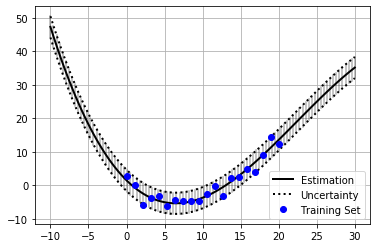

In [6]:
# Certainty in OLS
y_pred =  mesh.dot(wmle)
beta = np.array([noise]*pts)
temp = scaler.inverse_transform(mesh[:,1:])
plt.plot(temp[:,0],y_pred,'k-', linewidth = 2, label = 'Estimation')
plt.plot(temp[:,0],y_pred + 2*np.sqrt(beta),'k:', linewidth = 2, label = 'Uncertainty')
plt.plot(temp[:,0],y_pred - 2*np.sqrt(beta),'k:', linewidth = 2)
plt.plot(np.vstack((temp[:,0],temp[:,0])),
         np.vstack((y_pred + 2*np.sqrt(beta),y_pred - 2*np.sqrt(beta))),
         color=[0,0,0,0.3])
temp = scaler.inverse_transform(X[:,1:])
plt.plot(temp[:,0],y,'b.', linewidth = 2, label = 'Training Set', markersize = 12)
plt.grid()
plt.legend()

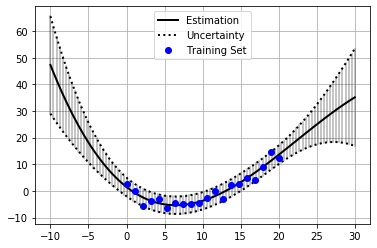

In [7]:
# Certainty in Bayesian Linear Regression
y_pred = mesh.dot(wmle)
sigma_inverse = alg.pinv(X.T.dot(X))
beta = np.array([noise + mesh[i,:].dot(sigma_inverse).dot(mesh[i,:].T) for i in range(pts)])
temp = scaler.inverse_transform(mesh[:,1:])
plt.plot(temp[:,0],y_pred,'k-', linewidth = 2, label = 'Estimation')
plt.plot(temp[:,0],y_pred + 2*np.sqrt(beta),'k:', linewidth = 2, label = 'Uncertainty')
plt.plot(temp[:,0],y_pred - 2*np.sqrt(beta),'k:', linewidth = 2)
plt.plot(np.vstack((temp[:,0],temp[:,0])),
         np.vstack((y_pred + 2*np.sqrt(beta),y_pred - 2*np.sqrt(beta))),
         color=[0,0,0,0.3])
temp = scaler.inverse_transform(X[:,1:])
plt.plot(temp[:,0],y,'b.', linewidth = 2, label = 'Training Set', markersize = 12)
plt.grid()
plt.legend()